## This is the Jupyter notebook with python code to load in the preprocessed response time data, to create the figures in the manuscript, and to create a .csv file for further statistical analysis in MATLAB. 

#BSD-3 License

### import necessary packages

In [1]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline

In [2]:
### decide whether or not to save figures and data for MATLAB

saveFig = True
saveMat = False

In [3]:
### import the .mat data files


#mat1 = loadmat('a1355e_Priming_block_3.mat',squeeze_me=1)
#mat2 = loadmat('a1355e_Priming_block_4',squeeze_me=1)


mat1 = loadmat('a1355e_priming_behavior_block_1.mat',squeeze_me=1)
mat2 = loadmat('a1355e_priming_behavior_block_2.mat',squeeze_me=1)


In [4]:
### extract variables of interest
### respLo = the minimum response time
### respHi = the maximum response time

respLo = 150 # minimum response time - 150 ms
respHi = 1000 # maximum response time - 1000 ms

button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']


In [5]:
### prepare for pandas data frame


a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}


In [6]:
### make pandas dataframes


dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')


In [7]:
### assign columns for dataframes


dataFdict1.columns = ['constant train','high initial pulses']
dataFdict2.columns = ['constant train','high initial pulses']


dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = 'a1355e'
dataMelt1['Subject'] = '1'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = 'a1355e'
dataMelt2['Subject'] = '1'
dataMelt2['block'] = '2'
dataMelt1.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)


In [8]:
### concatenate

frames = [dataMelt1,dataMelt2]

result = pd.concat(frames)
result
resultTrim = result[(result['response time (ms)'] < respHi) & (result['response time (ms)'] > respLo)]
resultTrim.groupby(['experiment','Subject','block']).mean()

experimentsOfInt =  ['constant train','high initial pulses']

In [9]:
### look at various metrics of interest


dataCleaned = resultTrim[resultTrim['experiment'].isin(experimentsOfInt)]
dataCleaned.groupby(['experiment','Subject','block']).mean()
dataCleaned.groupby(['experiment','Subject','block']).describe()
dataCleaned.groupby(['Subject','experiment']).describe().round()

#dataCleaned.groupby(['Subject','experiment']).mean()
#dataCleaned.groupby(['Subject','experiment']).std()

# get counts of each type
#dataCleaned.groupby(['Subject','experiment']).count()

response time (ms)                              \
                                         count   mean    std    min    25%   
Subject experiment                                                           
1       constant train                    21.0  478.0  101.0  297.0  428.0   
        high initial pulses               21.0  444.0  145.0  214.0  370.0   

                                                  
                               50%    75%    max  
Subject experiment                                
1       constant train       473.0  527.0  763.0  
        high initial pulses  414.0  461.0  834.0

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

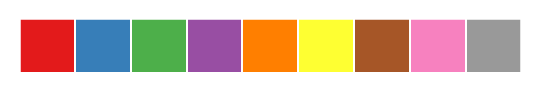

In [10]:
# set the color palette 

color_pal=sns.choose_colorbrewer_palette('qualitative')

#use set 1

# observe color palette 

sns.palplot(color_pal)
color_pal_3 = color_pal[0:4]
color_pal_2 = color_pal[3:5]
color_pal_2_v2 = color_pal[6:8]

No handles with labels found to put in legend.


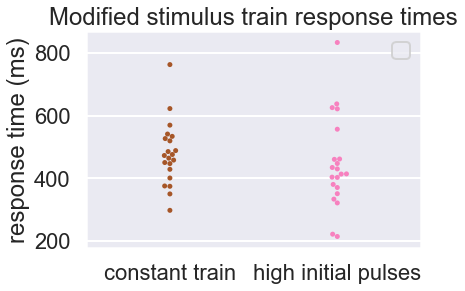

In [11]:
figPrime = sns.swarmplot(x="experiment",y="response time (ms)",data=dataCleaned,palette=color_pal_2_v2)
figPrime.set_title('Modified stimulus train response times')
figPrime.set_xlabel('')
figPrime.legend()

C:\Users\david\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\david\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


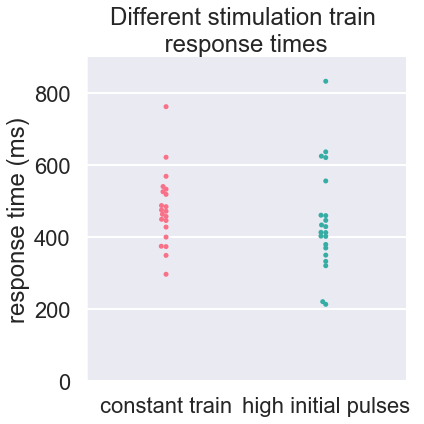

In [14]:
### use the "data cleaned" variable from above to make the individual subject plot

frameIndividual = sns.FacetGrid(data=dataCleaned,col='Subject',size=6, aspect=1,sharex=False,sharey=True)
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frameIndividual.map(sns.swarmplot,"experiment","response time (ms)",palette='husl')
frameIndividual.axes[0,0].set_xlabel('')


#dataCleaned['typeOrder']
figIndividual = plt.gcf()
plt.ylim([0,900])

frameIndividual.axes[0,0].set_title('Different stimulation train \n response times ')

if saveFig:
    figIndividual.savefig('a1355e_priming_RT_CP.svg', dpi=600,bbox_inches='tight')
    figIndividual.savefig('a1355e_priming_RT_CP.png', dpi=600,bbox_inches='tight')


In [13]:
dataCleaned

,experiment,response time (ms),Subject,block
0,constant train,569.54880,1,1
4,constant train,519.33184,1,1
5,constant train,450.06848,1,1
7,constant train,375.15264,1,1
9,constant train,541.12256,1,1
11,constant train,485.13024,1,1
12,constant train,526.62272,1,1
14,constant train,622.51008,1,1
15,high initial pulses,413.16352,1,1
16,high initial pulses,380.10880,1,1


In [48]:
from scipy.stats.mstats import kruskalwallis

priming = dataCleaned[(dataCleaned.Subject == '1') & (dataCleaned.experiment == 'priming')]['response time (ms)'].dropna()
noPriming = dataCleaned[(dataCleaned.Subject == '1') & (dataCleaned.experiment == 'no priming')]['response time (ms)'].dropna()
scipy.stats.kruskal(priming,noPriming)


KruskalResult(statistic=2.16563834836262, pvalue=0.14112600729045255)

ValueError: In safezip, len(args[0])=2 but len(args[1])=1

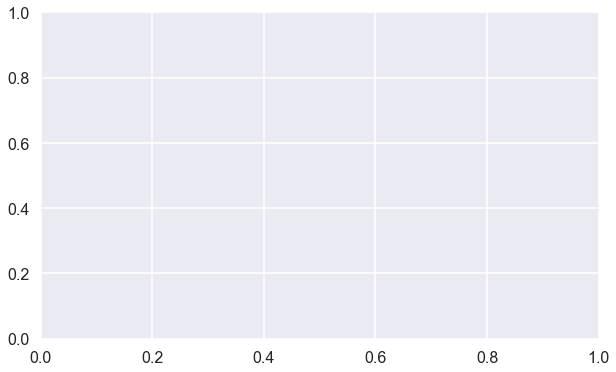

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dataStats = dataCleaned[dataCleaned.Subject=='1']['response time (ms)']
groupsStats = dataCleaned[dataCleaned.Subject=='1']['experiment']

tukey = pairwise_tukeyhsd(endog=dataStats,     # Data
                          groups=groupsStats,   # Groups
                          alpha=0.05)          # Significance level


tukey.summary()
tukey.plot_simultaneous()    # Plot group confidence intervals


In [ ]:
figBlock = sns.factorplot(x="experiment", y="response time (ms)", hue="block",size=5,aspect=1,
...                   col="Subject", data=dataCleaned,kind="swarm",dodge="True",col_order=['2','3','4'],
...                   order=['no priming','priming']a,
...                   palette=color_pal_2_v2)
plt.ylim([0,1100])

figBlock.axes[0,0].set_title('Subject 2')
figBlock.axes[0,1].set_title('Subject 3')
figBlock.axes[0,2].set_title('Subject 4')

figBlock.axes[0,0].set_xlabel('')
figBlock.axes[0,1].set_xlabel('')
figBlock.axes[0,2].set_xlabel('')

if saveFig:
    figBlock.savefig('swarmByBlockSplit_subj4.svg', dpi=600)
    figBlock.savefig('swarmByBlockSplit_subj4.png', dpi=300)

resultTrim_forBox = resultTrim[~(resultTrim['Subject'].isin(['3','4']) & (resultTrim['experiment'].isin(['100 ms '])))]
result[(result['response time (ms)'] < respHi) & (result['response time (ms)'] > respLo)]


frameGroup = sns.boxplot(x = 'experiment',y='response time (ms)',notch=True ,hue='Subject',orient="v", data = resultTrim_forBox,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '],palette=color_pal_3)
handles, labels = frameGroup.get_legend_handles_labels()
frameGroup  = sns.swarmplot(x = 'experiment',y='response time (ms)',size=4,hue='Subject',data = resultTrim,palette=['black'],split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
frameGroup.legend_.remove()
frameGroup.legend(handles, labels, loc="upper left", title="Subject")


figGroupBox = plt.gcf()
figGroupBox.set_size_inches(12,10)
plt.ylim([0,1100])
if saveFig:
    figGroupBox.savefig('swarmAndBoxSID_subj4.svg', dpi=600)
    figGroupBox.savefig('swarmAndBoxSID_subj4.png', dpi=300)

### To prepare the data to save for MATLAB


#dataCleaned=dataCleaned.assign(experiment=dataCleaned.experiment.apply(str)).sort_values("experiment",ascending=True)

equiv = {'touch':'a','100 ms ':'b','200 ms ':'c','400 ms ':'d', '800 ms ':'e'}

dataCleaned['sortCol'] = dataCleaned['experiment'].map(equiv)
#dataCleaned['experiment'] = pd.Categorical(dataCleaned['experiment'], ["tactor","100 ms ","200 ms ","400 ms ", "800 ms "])
dataCleaned=dataCleaned.assign(sortCol=dataCleaned.sortCol.apply(str)).sort_values(["Subject","sortCol"],ascending=[True,True])

typeOrderSort= ['100 ms ','200 ms ','400 ms ', '800 ms ']
dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.experiment.isin(typeOrderSort))
dataCleaned[dataCleaned['experiment']=='touch']


if saveMat:
    # get it ready for MATLAB
    a_dict = {col_name : dataCleaned[col_name].values for col_name in dataCleaned.columns.values}

    ## optional if you want to save the index as an array as well:
    # a_dict[df.index.name] = df.index.values
    scipy.io.savemat('dataCleaned_4subj.mat', {'struct':a_dict})

    dataCleaned.to_csv('dataCleaned_4subj.csv')


dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.experiment.isin(typeOrderSort),other='0')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.experiment.isin(typeOrderSort),other='1') 

dataCleaned



### use the "data cleaned" variable from above to make the individual subject plot

frameIndividual = sns.FacetGrid(data=dataCleaned,col='Subject',size=5, aspect=1,sharex=False,sharey=True,gridspec_kws={"width_ratios": [2, 5, 5, 5]})
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frameIndividual.map(sns.swarmplot,"experiment","response time (ms)",'typeOrder',palette='husl')
frameIndividual.axes[0,0].set_xlabel('')
frameIndividual.axes[0,1].set_xlabel('')
frameIndividual.axes[0,2].set_xlabel('')
frameIndividual.axes[0,3].set_xlabel('')

#dataCleaned['typeOrder']
figIndividual = plt.gcf()
plt.ylim([0,1100])

frameIndividual.axes[0,0].set_title('Subject 1')
frameIndividual.axes[0,1].set_title('Subject 2')
frameIndividual.axes[0,2].set_title('Subject 3')
frameIndividual.axes[0,3].set_title('Subject 4')


if saveFig:
    figIndividual.savefig('swarmBySid_col_4subj.svg', dpi=600)
    figIndividual.savefig('swarmBySid_col_4subj.png', dpi=600)


### test for normality using Anderson-Darling test


groupedData = dataCleaned.groupby(['Subject','experiment'])

groupedData.apply(lambda x: scipy.stats.anderson((x['response time (ms)']),dist='norm'))

import statsmodels.api as sm
groupedData.apply(lambda x: sm.stats.diagnostic.normal_ad((x['response time (ms)'])))